## In questo notebook verrà applicata la PCA sul dataset "USA Arrests".

La rappresentazione canonica di un dataset è la seguente.<br>
E' una matrice di dati $X \in R^{n \times p}$ dove: <br>
$\hspace{1cm}\bullet \hspace{0.5cm}n$ è il numero di campioni<br>
$\hspace{1cm}\bullet \hspace{0.5cm}p$ è il numero di features

Sulle righe ci sono i campioni mentre sulle colonne le features:<br>
$\hspace{1cm}\bullet \hspace{0.5cm} x_{i} \in R^{p} \rightarrow$ ogni campione è un vettore in uno spazio $p$-dimensionale<br>
$\hspace{1cm}\bullet \hspace{0.5cm} p_{j} \in R^{n} \rightarrow$ ogni feature è un vettore in uno spazio $n$-dimensionale<br>

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import datasets

# Importazione del dataset e preprocessing

In [2]:
dataframe = pd.read_csv("USArrests.csv")
n = np.shape(dataframe)[0]
p = np.shape(dataframe)[1]
print("Dimensioni del dataset: {}\n\t* Numero di campioni:\t{}\n\t* Numero di features:\t{}"
      .format(np.shape(dataframe), n, p))

Dimensioni del dataset: (50, 5)
	* Numero di campioni:	50
	* Numero di features:	5


In [3]:
dataframe = dataframe.rename(columns={ dataframe.columns[0]: "State" })
print(dataframe.head())

        State  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


In [4]:
def InfoColumns(df):
    d = {"Column Name": [], "Type": [], "Null Values": []}
    for c in df.columns:
        col = pd.isnull(df[c])
        d["Column Name"].append(c)
        d["Type"].append(df[c].dtype)
        d["Null Values"].append(np.shape(df[col])[0])
    dd = pd.DataFrame(d)
    return dd

print(InfoColumns(dataframe))

  Column Name     Type  Null Values
0       State   object            0
1      Murder  float64            0
2     Assault    int64            0
3    UrbanPop    int64            0
4        Rape  float64            0


A seguire alcune statistiche descrittive utili alla conduzione dell'analisi<br>
$\hspace{1cm}\bullet \hspace{0.5cm}$ Statistiche descrittive <br>
$\hspace{1cm}\bullet \hspace{0.5cm}$ Skewness (misura che consente di comprendere l'asimmetria della distribuzione di probabilità delle features rispetto alla sua media) <br>
$\hspace{1cm}\bullet \hspace{0.5cm}$ Kurtosis (misura che quantifica la forma di una distribuzione. La libreria Pandas utilizza la Kurtosis di Fisher, per cui una distribuzione normale ha valore 0)<br>


In [5]:
print(dataframe.describe(include='all'))

                 State    Murder     Assault   UrbanPop       Rape
count               50  50.00000   50.000000  50.000000  50.000000
unique              50       NaN         NaN        NaN        NaN
top     South Carolina       NaN         NaN        NaN        NaN
freq                 1       NaN         NaN        NaN        NaN
mean               NaN   7.78800  170.760000  65.540000  21.232000
std                NaN   4.35551   83.337661  14.474763   9.366385
min                NaN   0.80000   45.000000  32.000000   7.300000
25%                NaN   4.07500  109.000000  54.500000  15.075000
50%                NaN   7.25000  159.000000  66.000000  20.100000
75%                NaN  11.25000  249.000000  77.750000  26.175000
max                NaN  17.40000  337.000000  91.000000  46.000000


In [6]:
print(dataframe.skew(axis=0))

Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64


In [7]:
print(dataframe.kurtosis(axis=0))

Murder     -0.827488
Assault    -1.053848
UrbanPop   -0.738360
Rape        0.353964
dtype: float64


<AxesSubplot:title={'center':'Whiskers Plot - USA Arrests (1973)'}, xlabel='Features'>

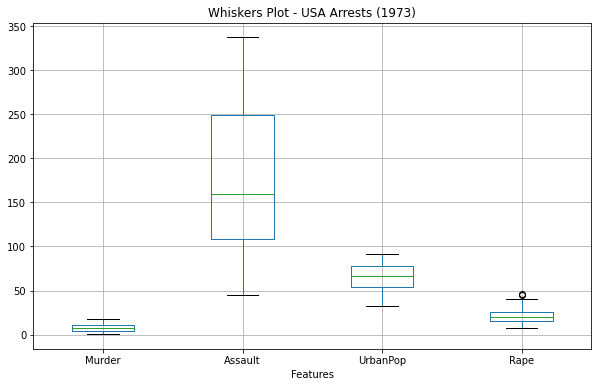

In [8]:
plt.figure(figsize=(10,6), facecolor='white')
plt.title("Whiskers Plot - USA Arrests (1973)")
plt.xlabel("Features")
dataframe.boxplot(figsize=(10,6))

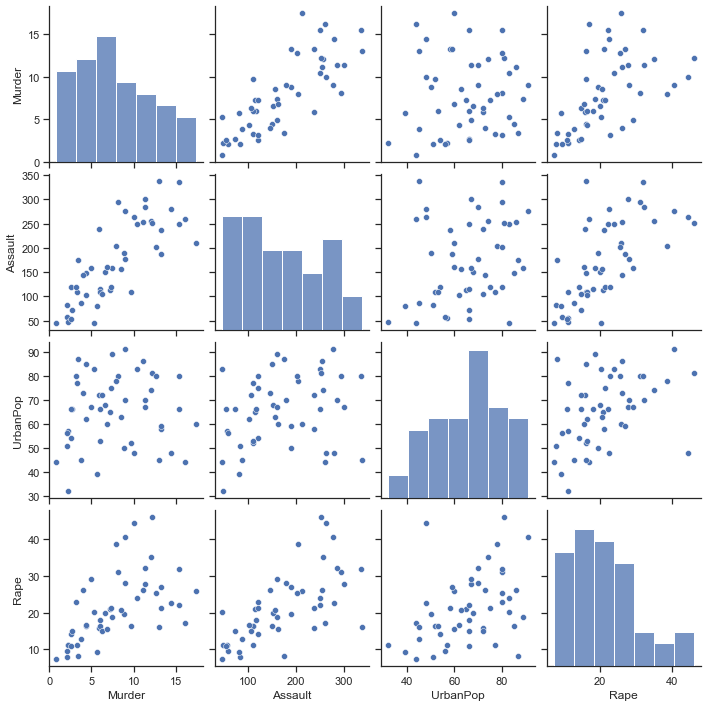

In [9]:
sns.set(style="ticks", color_codes=True)
scatter = sns.pairplot(data=dataframe, markers='o')

A seguire si opererà la centratura del dataset

In questa maniera gli assi originali canonici vengono spostati e centrati nella distribuzione del dataset

Viene calcolata un'approssimazione che permette di comprendere l'esistenza di una relazione lineare tra le features.

In questo caso specifico la feature 'State' viene eliminata ai fini dell'analisi

In [10]:
X = dataframe.drop(['State'], axis=1).values

In [11]:
Xc = X - np.mean(X, axis=0)

A questo punto si possono seguire due strategie differenti:

- PCA considerando la **matrice di covarianza** $C_{X_{C}}$<br> 
Se la varianza rispetta l'ordine di importanza che si vuole attribuire alle features (è definita una gerarchia basata sulla rilevanza)<br>
- PCA considerando la **matrice di correlazione** $R_{X_{C}}$ <br>
Se si vuole attribuire la stessa importanza a tutte le variabili<br>

**Scelta della matrice da utilizzare**

Occorre calcolare qualche misura statistica sul dataset originale(il presente è un caso multivariato, p>1) e verificare quale sia la varianza di ogni feature.

In particolare, se c'è una grande differenza tra le varianze, dovuta a differenti unità di misura, allora è meglio utilizzare la matrice di correlazione


Nota: Se la matrice centrata $X_{C}$ è standardizzata, allora $\implies (C_{X_{C}} = R_{X_{C}})$

A questo punto si calcolano sia la matrice di covarianza $C_{X_{C}}$ che quella di correlazione $R_{X_{C}}$ della trasposta della matrice centrata $C_{{(X)}^{T}}$, dato che l'obiettivo è quello di trovare, se esiste, relazioni tra le features e non tra i campioni.

Nota: Calcolare la matrice di covarianza sui dati centrati è equivalente a calcolarla sul dataset originale.

In [12]:
np.set_printoptions(suppress=False, linewidth=130)
Cov_Xc = np.cov(Xc.T)
print("Matrice di covarianza C del dataset trasposto centrato:\n\n{}"
      .format(np.array_str(Cov_Xc)))

Matrice di covarianza C del dataset trasposto centrato:

[[1.89704653e+01 2.91062367e+02 4.38620408e+00 2.29914122e+01]
 [2.91062367e+02 6.94516571e+03 3.12275102e+02 5.19269061e+02]
 [4.38620408e+00 3.12275102e+02 2.09518776e+02 5.57680816e+01]
 [2.29914122e+01 5.19269061e+02 5.57680816e+01 8.77291592e+01]]


In [13]:
Corr_Xc = np.corrcoef(Xc.T)
print("Matrice di correlazione R del dataset trasposto centrato:\n\n{}"
      .format(np.array_str(Corr_Xc)))

Matrice di correlazione R del dataset trasposto centrato:

[[1.         0.80187331 0.06957262 0.56357883]
 [0.80187331 1.         0.2588717  0.66524123]
 [0.06957262 0.2588717  1.         0.41134124]
 [0.56357883 0.66524123 0.41134124 1.        ]]


Ora si calcolano gli autovalori e gli autovettori di entrambe le matrici.

In [14]:
eigenvalues_covariance, eigenvectors_covariance = np.linalg.eig(Cov_Xc)
print("Autovalori della matrice di covarianza C:\n{}\n".format(np.array_str(eigenvalues_covariance)))
print("Autovettori della matrice di covarianza C:\n{}".format(np.array_str(eigenvectors_covariance)))

Autovalori della matrice di covarianza C:
[7.01111485e+03 2.01992366e+02 6.16424618e+00 4.21126508e+01]

Autovettori della matrice di covarianza C:
[[ 0.04170432  0.04482166 -0.99492173  0.07989066]
 [ 0.99522128  0.05876003  0.0389383  -0.06756974]
 [ 0.04633575 -0.97685748 -0.05816914 -0.20054629]
 [ 0.0751555  -0.20071807  0.07232502  0.97408059]]


In [15]:
eigenvalues_correlation, eigenvectors_correlation = np.linalg.eig(Corr_Xc)
print("Autovalori della matrice di correlazione R:\n{}\n".format(np.array_str(eigenvalues_correlation)))
print("Autovettori della matrice di correlazione R:\n{}".format(np.array_str(eigenvectors_correlation)))

Autovalori della matrice di correlazione R:
[2.48024158 0.98976515 0.17343009 0.35656318]

Autovettori della matrice di correlazione R:
[[ 0.53589947  0.41818087  0.6492278  -0.34123273]
 [ 0.58318363  0.1879856  -0.74340748 -0.26814843]
 [ 0.27819087 -0.87280619  0.13387773 -0.37801579]
 [ 0.54343209 -0.16731864  0.08902432  0.81777791]]


La matrice degli autovettori (per C e R) rappresenta la matrice di rotazione $A_{p}$ :<br>
$Y = X \cdot A_{p}$ dove 

\begin{cases}
\bullet \hspace{0.5cm} Y \in R^{n \times p} \rightarrow \text{ matrice degli scores (PCs)}\\
\bullet \hspace{0.5cm} X \in R^{n \times p}  \rightarrow \text{ matrice originale}\\
\bullet \hspace{0.5cm} A_{p} \in R^{p \times p}  \rightarrow \text{matrice dei loadings}
\end{cases}

La matrice $A_{p}$ ruota i dati originali nella direzione di massima varianza del dataset ed è utile per:<br>
$\hspace{1cm} 1. \hspace{0.5cm}$ Effettuare feature selection sulle variabili originali<br>
$\hspace{1cm} 2. \hspace{0.5cm}$ Fornire interpretabilità alle PCs <br>
$\hspace{2.3cm} (\bullet) \hspace{0.5cm}$ in termini di grandezza dei valori assoluti dell'asse<br>
$\hspace{2.3cm} (\bullet) \hspace{0.5cm}$ usando i coefficienti di correlazione tra le PCs e le feature originali $X_{i}$<br>

### Si consideri la matrice $A_{p}$ in relazione alla matrice di covarianza $C$
Nella colonna 1, il massimo valore assoluto è in posizione 2, questo definisce che la seconda feature sarà più importante nella costruzione di $Y_1$.<br><br>
Nella colonna 2, il massimo valore assoluto è in posizione 3, questo definisce che la terza feature sarà più importante nella costruzione di $Y_2$.<br><br>
Nella colonna 3, il massimo valore assoluto è in posizione 1, questo definisce che la prima feature sarà più importante nella costruzione di $Y_3$.<br><br>
Nella colonna 4, il massimo valore assoluto è in posizione 4, questo definisce che la quarta feature sarà più importante nella costruzione di $Y_4$.<hr>

### Si consideri la matrice $A_{p}$ in relazione alla matrice di correlazione $R$<br><br>
Nella colonna 1, il massimo valore assoluto è in posizione 2, questo definisce che la seconda feature sarà più importante nella costruzione di $Y_1$.<br><br>
Nella colonna 2, il massimo valore assoluto è in posizione 3, questo definisce che la terza feature sarà più importante nella costruzione di $Y_2$.<br><br>
Nella colonna 3, il massimo valore assoluto è in posizione 2, questo definisce che la seconda feature sarà più importante nella costruzione di $Y_3$.<br><br>
Nella colonna 4, il massimo valore assoluto è in posizione 4, questo definisce che la quarta feature sarà più importante nella costruzione di $Y_4$.<br>

Si calcola la matrice  $Y$ (quindi, le componenti principali), e può essere definita anche una semantica per le nuove features (PCs) mediante lo studio della correlazione tra le features originali $X_{i}$ e le componenti principali $Y_{j}$.

In [16]:
YC = Xc.dot(eigenvectors_covariance)
print("Dimensione della matrice Y: \t {}\n\t(*) usando i loadings della matrice di covarianza C\n"
      "\t(*) Deve avere le stesse dimensioni del dataset originale\n".format(np.shape(YC)))

Dimensione della matrice Y: 	 (50, 4)
	(*) usando i loadings della matrice di covarianza C
	(*) Deve avere le stesse dimensioni del dataset originale



In [17]:
YR = Xc.dot(eigenvectors_correlation)
print("Dimensione della matrice Y: \t {}\n\t(*) usando i loadings della matrice di correlazione R\n"
      "\t(*) Deve avere le stesse dimensioni del dataset originale".format(np.shape(YR)))

Dimensione della matrice Y: 	 (50, 4)
	(*) usando i loadings della matrice di correlazione R
	(*) Deve avere le stesse dimensioni del dataset originale


Si mostra di seguito uno lo scree plot, utile a scegliere il numero di componenti $(k)$ migliore da conservare per tenere conto della maggior parte della varianza nel dataset

Il numero $k$ è calcolato utilizzando la percentuali cumulativa della varianza totale.

$\hspace{1cm}(\bullet)\hspace{0.3cm}C \rightarrow t_{k} = 100 \cdot \frac{\sum_{i=1}^{k}\lambda_{i}}{\sum_{i=1}^{p}\lambda_{i}} = 100 \cdot \frac{\sum_{i=1}^{k}\lambda_{i}}{trace(C_{X})}$<br>

$\hspace{1cm}(\bullet)\hspace{0.3cm} R \rightarrow t_{k} = 100 \cdot \frac{\sum_{i=1}^{k}\lambda_{i}}{p}$<br><br>

Varianza spiegata per ogni feature (covarianza):
	[9.66e+01 2.78e+00 5.80e-01 8.49e-02]
Varianza cumilativa (covarianza):n	[ 96.55  99.34  99.92 100.  ]


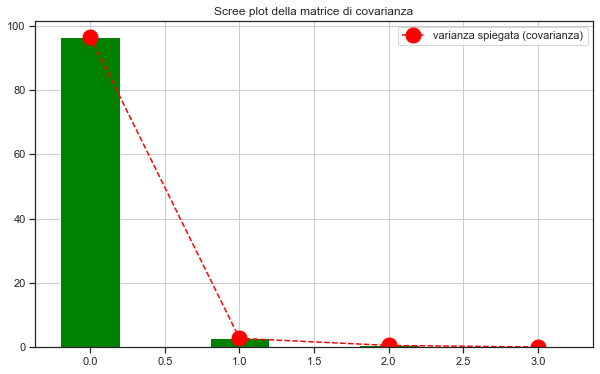

In [18]:
total_variation_covariance = np.sum(eigenvalues_covariance)
explained_variance_covariance = np.asarray(
    [100*(i/total_variation_covariance) for i in sorted(eigenvalues_covariance, reverse=True)])
print("Varianza spiegata per ogni feature (covarianza):\n\t{}"
      .format(np.array_str(explained_variance_covariance, precision=2)))
cumulative_covariance = np.cumsum(explained_variance_covariance)
print("Varianza cumilativa (covarianza):n\t{}"
      .format(np.array_str(cumulative_covariance, precision=2)))

fig1 = plt.figure(1, figsize=(10,6))
plt.title("Scree plot della matrice di covarianza")
plt.bar(x=np.arange(np.shape(explained_variance_covariance)[0]), 
        height=explained_variance_covariance, 
        width=0.4, color="green")
plt.plot(np.arange(np.shape(explained_variance_covariance)[0]), 
         explained_variance_covariance, 
         linestyle="--", marker="o", markersize=15,
         color="red", label="varianza spiegata (covarianza)")
plt.legend()
plt.grid()
plt.show()

Varianza spiegata per ogni feature (correlazione):
	[62.01 24.74  8.91  4.34]
Varianza cumulativa (correlazione):
	[ 62.01  86.75  95.66 100.  ]


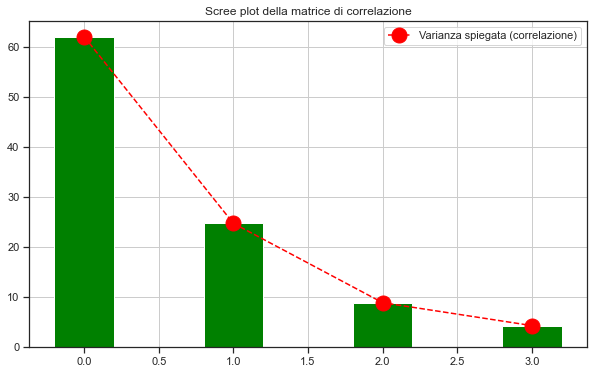

In [19]:
total_variation_correlation = np.sum(eigenvalues_correlation)
explained_variance_correlation = np.asarray(
    [100*(i/total_variation_correlation) for i in sorted(eigenvalues_correlation, reverse=True)])
print("Varianza spiegata per ogni feature (correlazione):\n\t{}"
      .format(np.array_str(explained_variance_correlation, precision=2)))
cumulative_correlation = np.cumsum(explained_variance_correlation)
print("Varianza cumulativa (correlazione):\n\t{}"
      .format(np.array_str(cumulative_correlation, precision=2)))

fig2 = plt.figure(2, figsize=(10,6))
plt.title("Scree plot della matrice di correlazione")
plt.bar(x=np.arange(np.shape(explained_variance_correlation)[0]), 
        height=explained_variance_correlation, 
        width=0.4, color="green")
plt.plot(np.arange(np.shape(explained_variance_correlation)[0]), 
         explained_variance_correlation, 
         linestyle="--", marker="o", markersize=15,
         color="red", label="Varianza spiegata (correlazione)")
plt.legend()
plt.grid()
plt.show()

In [20]:
number_k = 2

### Cerchio di correlazione (features originali e PCs della matrice di covarianza C)

In [21]:
CC_Covariance = []
for i in range(np.shape(X)[1]):
    f = []
    for j in range(np.shape(YC)[1]):
        c = (np.corrcoef(X[:,i], YC[:,j])[0])[1]
        f.append(c)
    CC_Covariance.append(f)

In [22]:
CorrelationCircle_Covariance = np.asarray(CC_Covariance)
print("Matrice di correlazione completa (basata su C) :\n{}"
      .format(CorrelationCircle_Covariance))

Matrice di correlazione completa (basata su C) :
[[ 0.80174378  0.14625691 -0.56713952  0.11903188]
 [ 0.99993527  0.01002093  0.00116005 -0.00526159]
 [ 0.26803915 -0.9591515  -0.00997749 -0.0899103 ]
 [ 0.67186548 -0.30456638  0.01917152  0.6748841 ]]


In [23]:
print("Matrice di correlazione con {} PCs (basata su C):\n{}"
      .format(number_k, CorrelationCircle_Covariance[:,0:number_k]))

Matrice di correlazione con 2 PCs (basata su C):
[[ 0.80174378  0.14625691]
 [ 0.99993527  0.01002093]
 [ 0.26803915 -0.9591515 ]
 [ 0.67186548 -0.30456638]]


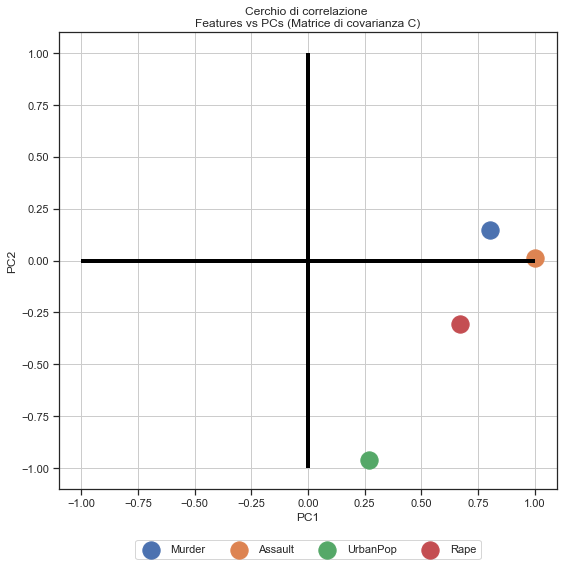

In [24]:
fig3 = plt.figure(figsize=(8,8))
plt.title("Cerchio di correlazione \nFeatures vs PCs (Matrice di covarianza C)")
plt.hlines(y=0, xmin=-1, xmax=1, colors='black', linewidth=4, linestyle='solid')
plt.vlines(x=0, ymin=-1, ymax=1, colors='black', linewidth=4, linestyle='solid')
for i in range(0,np.shape(X)[1]):
    plt.scatter(CorrelationCircle_Covariance[i:i+1,0:1], 
                CorrelationCircle_Covariance[i:i+1,1:2], s=300, label=dataframe.columns[i+1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           fancybox=True, ncol=np.shape(X)[1])
plt.grid()
plt.tight_layout()
plt.show()

### Cerchio di correlazione (features originali e PCs della matrice di correlaione R)

In [25]:
CC_Correlation = []
for i in range(np.shape(X)[1]):
    f = []
    for j in range(np.shape(YR)[1]):
        c = (np.corrcoef(X[:,i], YR[:,j])[0])[1]
        f.append(c)
    CC_Correlation.append(f)
    

In [26]:
CorrelationCircle_Correlation = np.asarray(CC_Correlation)

In [27]:
print("Matrice di correlazione completa (basata su R):\n{}"
      .format(CorrelationCircle_Correlation))

Matrice di correlazione completa (basata su R):
[[ 0.80447685  0.69342268 -0.7880837  -0.74353894]
 [ 0.99352106  0.70398089 -0.99910691 -0.95455043]
 [ 0.34137813 -0.4997308  -0.23108325 -0.39458135]
 [ 0.73097726  0.25736029 -0.64737707 -0.49481763]]


In [28]:
print("Matrice di correlazione con {} PCs (basata su R):\n{}"
      .format(number_k, CorrelationCircle_Correlation[:,0:number_k]))

Matrice di correlazione con 2 PCs (basata su R):
[[ 0.80447685  0.69342268]
 [ 0.99352106  0.70398089]
 [ 0.34137813 -0.4997308 ]
 [ 0.73097726  0.25736029]]


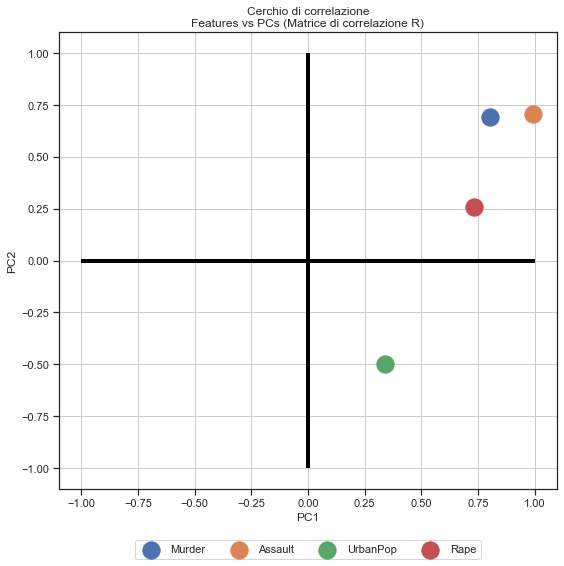

In [29]:
fig4 = plt.figure(figsize=(8,8))
plt.title("Cerchio di correlazione\nFeatures vs PCs (Matrice di correlazione R)")
plt.hlines(y=0, xmin=-1, xmax=1, colors='black', linewidth=4, linestyle='solid')
plt.vlines(x=0, ymin=-1, ymax=1, colors='black', linewidth=4, linestyle='solid')
for i in range(0,np.shape(X)[1]):
    plt.scatter(CorrelationCircle_Correlation[i:i+1,0:1], 
                CorrelationCircle_Correlation[i:i+1,1:2], s=300, label=dataframe.columns[i+1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           fancybox=True,ncol=np.shape(X)[1])
plt.grid()
plt.tight_layout()
plt.show()

# Conclusioni

### Matrice di covarianza
Utilizzando la matrice di covarianza $C_{X}$ per calcolare la PCA e scegliendo $k = 2$ (analisi qualitativa) che consente di mantenere il  $\sim 99\%$ delle informazioni totali celate nel dataset, si può comprendere che:

$\hspace{1cm}(\bullet)\hspace{0.3cm}$ PC1 è un indice del numero di arresti (e quindi di crimini)<br>
$\hspace{1cm}(\bullet)\hspace{0.3cm}$ PC2 è un indice della densità della popolazione

### Matrice di correlazione
Utilizzando la matrice di correlazione $R_{X}$ per calcolare la PCA e scegliendo $k = 2$ (analisi qualitativa) che consente di mantenere l' $\sim 87\%$ delle informazioni totali celate nel dataset, si può comprendere che:

$\hspace{1cm}(\bullet)\hspace{0.3cm}$ PC1 è un indice del numero di arresti (e quindi di crimini)

